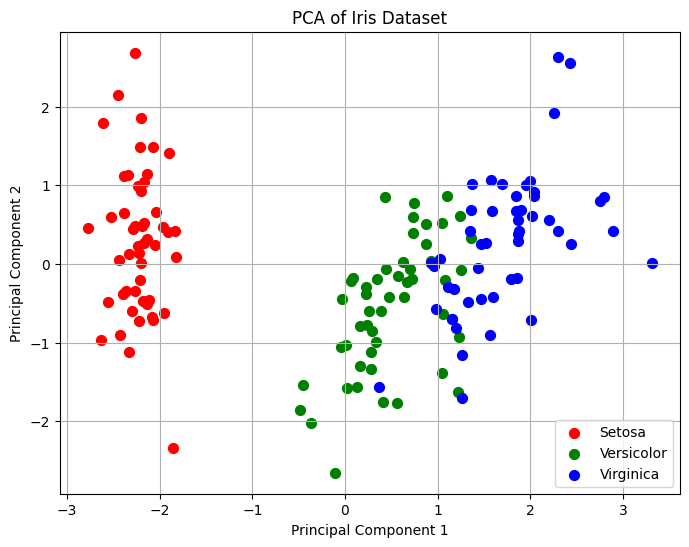

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plot the data points in the reduced-dimensional space
plt.figure(figsize=(8, 6))
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = df_pca['Target'] == targets.index(target)
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


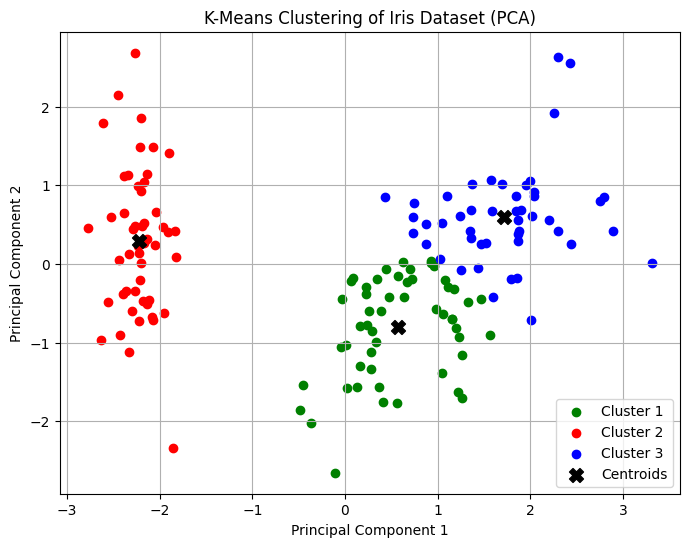

In [ ]:
# Apply k-means clustering to PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Number of clusters set to 3
kmeans.fit(X_pca)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['g', 'r', 'b']
for i in range(3):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='X', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset (PCA)')
plt.legend()
plt.grid(True)
plt.show()


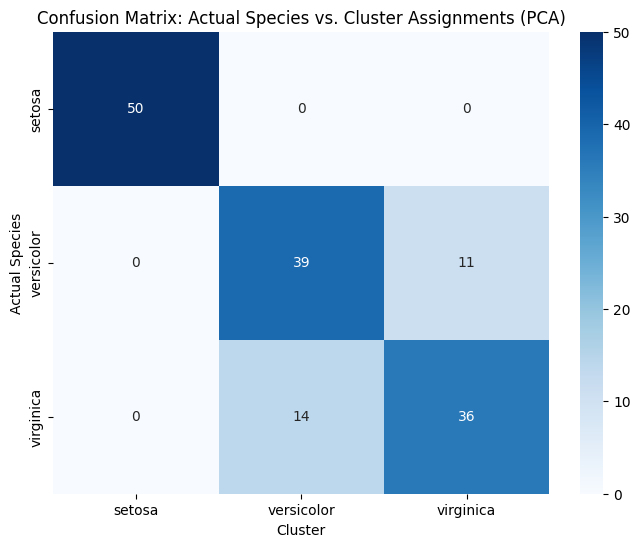

In [ ]:
# Map cluster labels to species labels based on majority vote
cluster_to_species = {}
for i in range(3):
    majority_species = np.argmax(np.bincount(y[cluster_labels == i]))
    cluster_to_species[i] = majority_species

# Map cluster labels to species labels
mapped_cluster_labels = [cluster_to_species[label] for label in cluster_labels]

# Create confusion matrix
conf_matrix = confusion_matrix(y, mapped_cluster_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Cluster')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix: Actual Species vs. Cluster Assignments (PCA)')
plt.show()

